In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [177]:
ch=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
ch["TotalCharges"][ch["TotalCharges"]==" "]=0
ch["TotalCharges"]=ch["TotalCharges"].astype("float64")
ch["tenure"][ch["Contract"]=="Month-to-month"]=0
ch["tenure"][ch["Contract"]=="One year"]=1
ch["tenure"][ch["Contract"]=="Two year"]=2
ch[["gender","Partner","Dependents","PhoneService","MultipleLines",'PaperlessBilling',"Churn"]]=ch[["gender","Partner","Dependents","PhoneService","MultipleLines",'PaperlessBilling',"Churn"]].apply(LabelEncoder().fit_transform)
ch[["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaymentMethod']]=ch[["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaymentMethod']].apply(LabelEncoder().fit_transform)

C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_

In [ ]:
u=["MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaymentMethod']
for i in u:
    dummy = pd.get_dummies(ch[i],columns=ch[i].unique())
    ch=pd.concat([ch,dummy],axis=1,sort=True)
    ch.drop([i],axis=1,inplace=True)

In [7]:
ch1=ch.groupby("Contract")

In [16]:
ch1["tenure"].get_group("Month-to-month").max()

72

In [12]:
from scipy.stats import f_oneway

In [15]:
f_oneway(ch1["tenure"].get_group("Month-to-month"),ch1["tenure"].get_group("One year"),ch1["tenure"].get_group("Two year"))

F_onewayResult(statistic=2960.0151181845877, pvalue=0.0)

In [14]:
ch1.groups

{'Month-to-month': Int64Index([   0,    2,    4,    5,    6,    7,    8,   10,   13,   14,
             ...
             7026, 7027, 7029, 7030, 7032, 7033, 7034, 7035, 7040, 7041],
            dtype='int64', length=3875),
 'One year': Int64Index([   1,    3,    9,   12,   16,   21,   32,   40,   42,   54,
             ...
             6994, 6996, 7000, 7005, 7021, 7022, 7031, 7036, 7038, 7039],
            dtype='int64', length=1473),
 'Two year': Int64Index([  11,   15,   17,   23,   28,   30,   35,   41,   43,   48,
             ...
             6982, 6995, 7002, 7007, 7012, 7017, 7019, 7028, 7037, 7042],
            dtype='int64', length=1695)}

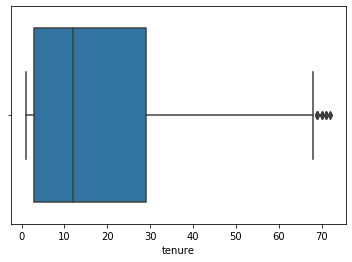

In [23]:
sns.boxplot(ch1["tenure"].get_group("Month-to-month"))

plt.show()

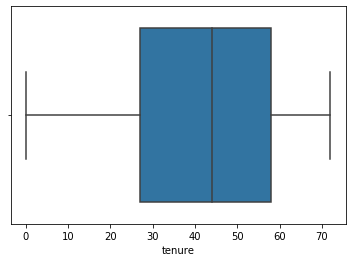

In [22]:
sns.boxplot(ch1["tenure"].get_group("One year"))

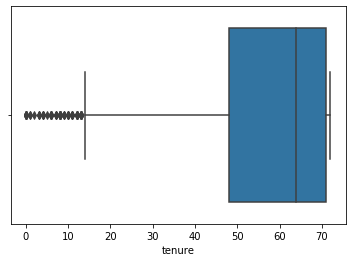

In [24]:
sns.boxplot(ch1["tenure"].get_group("Two year"))

C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Barath\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so w

In [79]:
sns.boxplot(ch1["tenure"].get_group("Month-to-month"))

In [178]:
ch.drop(["customerID"],axis=1,inplace=True)

In [200]:
x=ch.drop(["Churn"],axis=1)
y=ch["Churn"]

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.35,random_state=341)

In [201]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
confusion_matrix(ytest,pred)

array([[1647,  176],
       [ 316,  327]], dtype=int64)

In [202]:
accuracy_score(ytest,pred)

0.8004866180048662

In [182]:
c=[]
for i in range(0,1111):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3,random_state=i)
    rf.fit(xtrain,ytrain)
    pred=rf.predict(xtest)
    c.append(accuracy_score(ytest,pred))
    print(i)
c

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

[0.7856128726928537,
 0.7998106956933271,
 0.7770941788925698,
 0.7998106956933271,
 0.767628963558921,
 0.7927117841930904,
 0.795551348793185,
 0.7799337434926644,
 0.7780407004259347,
 0.779460482725982,
 0.7889256980596309,
 0.792238523426408,
 0.7903454803596782,
 0.7841930903928065,
 0.7936583057264552,
 0.783719829626124,
 0.792238523426408,
 0.7813535257927118,
 0.7870326549929011,
 0.7960246095598675,
 0.7927117841930904,
 0.7785139611926172,
 0.7775674396592522,
 0.7813535257927118,
 0.8092759110269758,
 0.7903454803596782,
 0.8017037387600567,
 0.7808802650260294,
 0.779460482725982,
 0.7808802650260294,
 0.7723615712257453,
 0.795551348793185,
 0.7737813535257927,
 0.780407004259347,
 0.7785139611926172,
 0.7998106956933271,
 0.7974443918599148,
 0.7846663511594889,
 0.7766209181258874,
 0.7766209181258874,
 0.767628963558921,
 0.7851396119261713,
 0.795551348793185,
 0.7780407004259347,
 0.7775674396592522,
 0.7893989588263133,
 0.7983909133932797,
 0.7813535257927118,
 0.

In [54]:
d=c

In [58]:
temp=0
sup=0
for i in range(len(d)):
    if(d[i]>temp):
        temp=d[i]
        sup=i
print(temp,i)
    
    

0.8126520681265207 1110


In [99]:
sc=StandardScaler()
ch["MonthlyCharges"]=sc.fit_transform(ch[["MonthlyCharges"]])
ch["TotalCharges"]=sc.fit_transform(ch[["TotalCharges"]])

In [183]:
e=0
e=c
temp1=0
sup1=0
for i in range(len(e)):
    if(e[i]>temp):
        temp1=d[i]
        sup1=i
print(temp1,sup1)

0.8008921330089214 341


In [199]:
ch

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,1,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,1,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,1,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,1,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,0,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,0,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [122]:
ch.drop(["No internet service"],axis=1,inplace=True)

In [1]:
ch[["Churn"]]=ch[["Churn"]].apply(LabelEncoder().fit_transform)
#ch[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',"Churn"]]=ch[["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',"Churn"]].apply(LabelEncoder().fit_transform)

u=["gender","Partner","Dependents","PhoneService",'PaperlessBilling',"MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV",'StreamingMovies', 'Contract', 'PaymentMethod']
for i in u:
    m=ch[i].unique()
    m=m+i
    dummy = pd.get_dummies(ch[i],columns=ch[i].unique(),prefix=i)
    ch=pd.concat([ch,dummy],axis=1,sort=True)
    ch.drop([i],axis=1,inplace=True)

NameError: name 'ch' is not defined